In [1]:
#importing the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
data = pd.read_csv(r'C:\Users\USER\Desktop\internship\Assignment-1 Dataset.csv')

In [3]:
#explore the data
data.head()

,Alert Id,Alert Source,Timestamp,Location,Severity,Description,Affected Component,Assigned To,Status,Priority,Resolution Notes,Escalation Level,Notifications,Labels
0,1,motherboard,12-07-2019 10:12,Denver,low,Database connection lost,Network,Mike,resolved,Low,Investigating the issue,Level 4,Email sent to stakeholders,critical
1,2,CPU,26-06-2021 07:26,IN,high,Server down,Server,Emily,in progress,High,Working on the fix,Level 4,Email sent to stakeholders,important
2,3,hard drive,05-11-2020 20:55,San Francisco,medium,Unauthorized access attempt,Software,John,open,Medium,Investigating the issue,Level 2,Letter mailed to stakeholders,high priority
3,4,GPU,25-10-2020 18:17,TX,low,Memory usage exceeded threshold,Database,Sara,resolved,High,Fix deployed,Level 1,SMS sent to stakeholders,high priority
4,5,router,13-04-2020 06:25,Dallas,high,Unauthorized access attempt,Application,John,resolved,NaN,Working on the fix,Level 1,SMS sent to stakeholders,low priority


In [4]:
data.shape

(1000, 14)

In [5]:
len(data)

1000

In [6]:
data.describe

<bound method NDFrame.describe of      Alert Id  Alert Source         Timestamp       Location Severity  \
0            1  motherboard  12-07-2019 10:12         Denver      low   
1            2          CPU  26-06-2021 07:26             IN     high   
2            3   hard drive  05-11-2020 20:55  San Francisco   medium   
3            4          GPU  25-10-2020 18:17             TX      low   
4            5       router  13-04-2020 06:25         Dallas     high   
..         ...          ...               ...            ...      ...   
995        996         case  30-06-2022 10:25   Jacksonville     high   
996        997          CPU  09-02-2021 20:25             NY   medium   
997        998          RAM  11-08-2020 23:20             AZ   medium   
998        999          RAM  04-07-2021 22:33             CA      low   
999       1000        modem  16-11-2019 14:46             NC   medium   

                         Description Affected Component  Assigned To  \
0           Datab

In [7]:
data.info

<bound method DataFrame.info of      Alert Id  Alert Source         Timestamp       Location Severity  \
0            1  motherboard  12-07-2019 10:12         Denver      low   
1            2          CPU  26-06-2021 07:26             IN     high   
2            3   hard drive  05-11-2020 20:55  San Francisco   medium   
3            4          GPU  25-10-2020 18:17             TX      low   
4            5       router  13-04-2020 06:25         Dallas     high   
..         ...          ...               ...            ...      ...   
995        996         case  30-06-2022 10:25   Jacksonville     high   
996        997          CPU  09-02-2021 20:25             NY   medium   
997        998          RAM  11-08-2020 23:20             AZ   medium   
998        999          RAM  04-07-2021 22:33             CA      low   
999       1000        modem  16-11-2019 14:46             NC   medium   

                         Description Affected Component  Assigned To  \
0           Databas

In [8]:
data.nunique()

Alert Id               1000
Alert Source             12
Timestamp              1000
Location                 33
Severity                  3
Description               5
Affected Component        9
Assigned To              10
Status                    3
Priority                  4
Resolution Notes          5
Escalation Level          5
Notifications             4
Labels                    6
dtype: int64

In [9]:
data['Priority'].fillna(method='ffill',inplace=True)

In [10]:
data.isnull().sum()

Alert Id               0
Alert Source           0
Timestamp              0
Location               0
Severity               0
Description            0
Affected Component     0
Assigned To            0
Status                 0
Priority               0
Resolution Notes       0
Escalation Level       0
Notifications          0
Labels                 0
dtype: int64

In [11]:
data['Severity'].value_counts()

high      347
low       330
medium    323
Name: Severity, dtype: int64

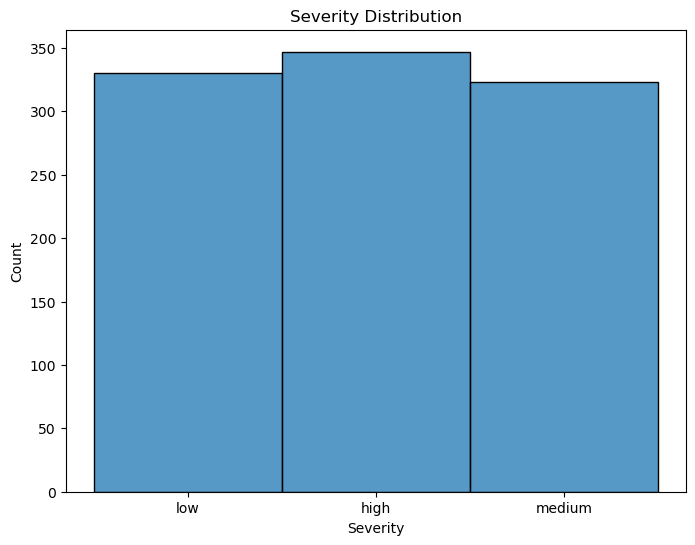

In [12]:
# Plotting a histogram of the Severity column
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Severity')
plt.title('Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

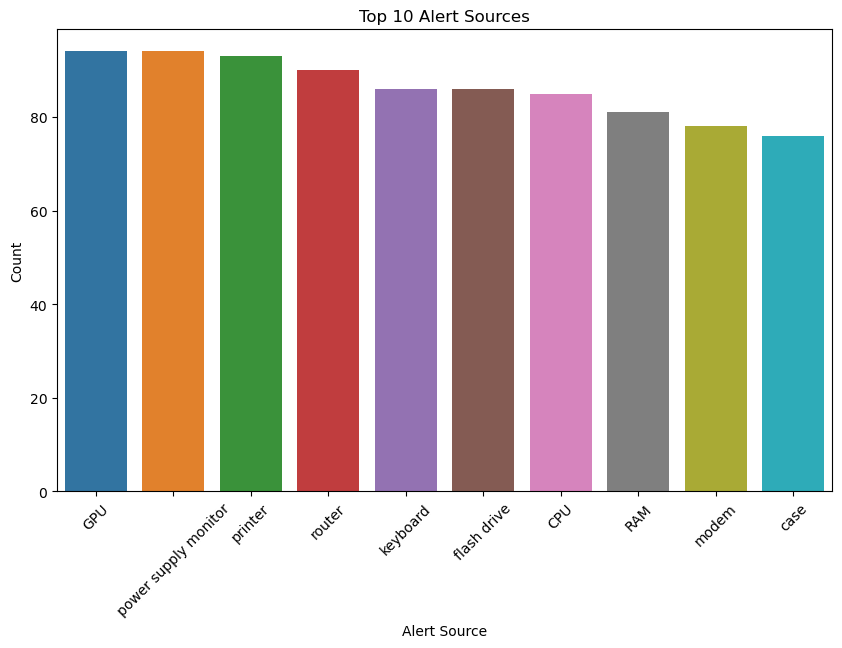

In [13]:
# Plotting a bar chart of the top 10 most common Alert Sources
top_alert_sources = data['Alert Source'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_alert_sources.index, y=top_alert_sources.values)
plt.title('Top 10 Alert Sources')
plt.xlabel('Alert Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

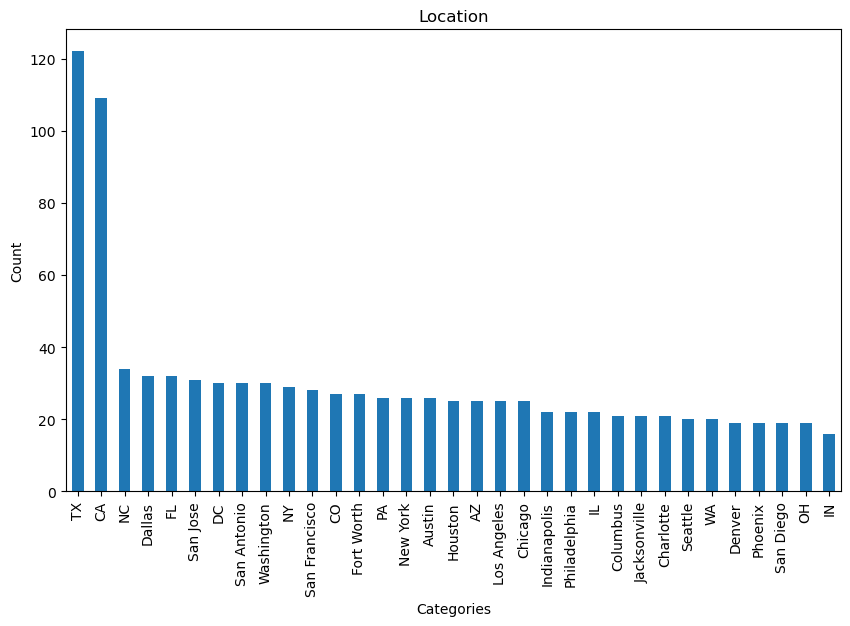

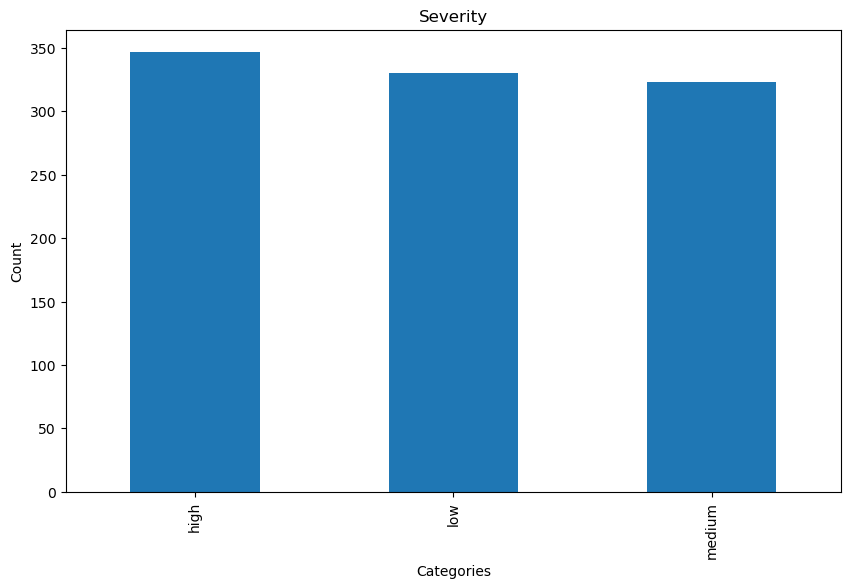

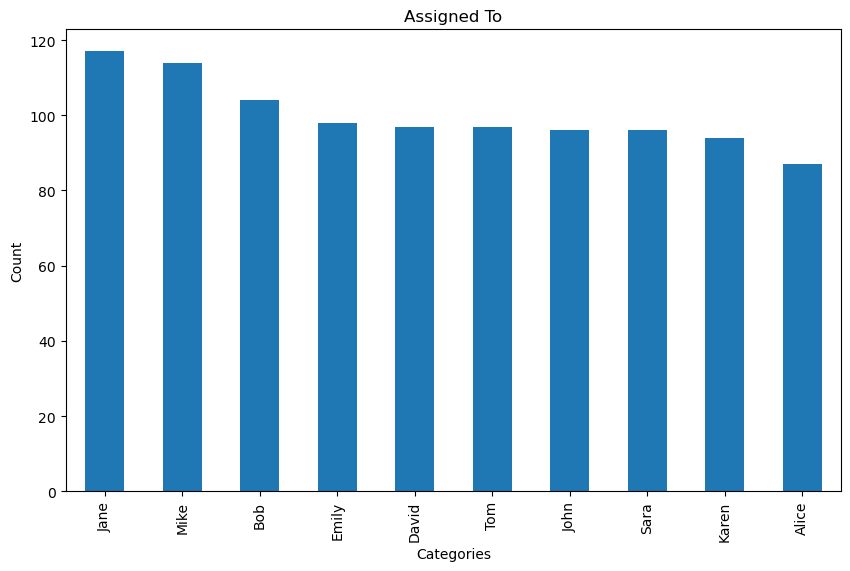

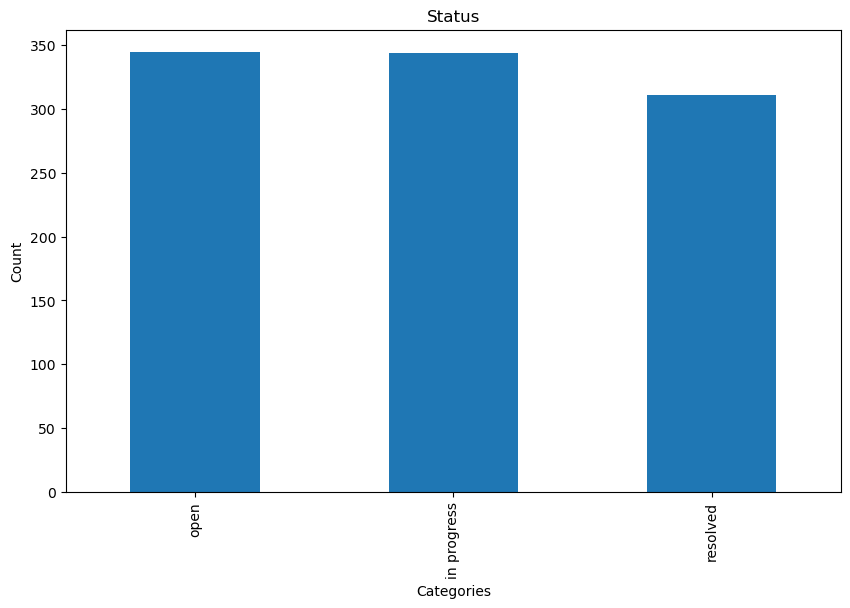

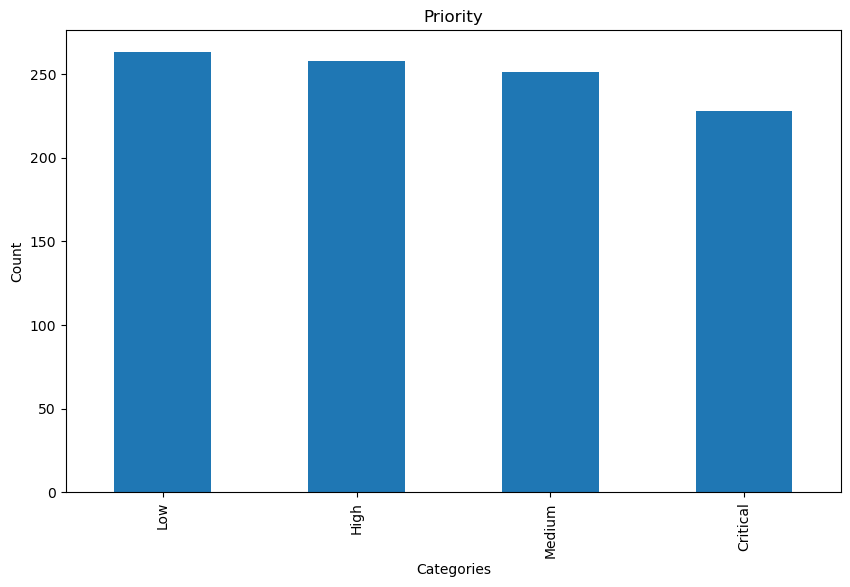

In [14]:
categorical_cols = ['Location', 'Severity', 'Assigned To', 'Status', 'Priority']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.show()

# TREND ANALYSIS

In [15]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

In [16]:
data_resampled = data.resample('M').size()
data_resampled

Timestamp
2019-01-31     7
2019-02-28     4
2019-03-31     3
2019-04-30     7
2019-05-31    19
2019-06-30    25
2019-07-31    23
2019-08-31    27
2019-09-30    16
2019-10-31    17
2019-11-30    14
2019-12-31    16
2020-01-31    21
2020-02-29    22
2020-03-31    26
2020-04-30    26
2020-05-31    24
2020-06-30    23
2020-07-31    24
2020-08-31    23
2020-09-30    18
2020-10-31    26
2020-11-30    16
2020-12-31     9
2021-01-31    19
2021-02-28    13
2021-03-31    22
2021-04-30    11
2021-05-31    26
2021-06-30    21
2021-07-31    14
2021-08-31    15
2021-09-30    19
2021-10-31    14
2021-11-30    24
2021-12-31    17
2022-01-31    24
2022-02-28    20
2022-03-31    28
2022-04-30    17
2022-05-31    25
2022-06-30    26
2022-07-31    26
2022-08-31    23
2022-09-30    29
2022-10-31    29
2022-11-30    33
2022-12-31    22
2023-01-31    19
2023-02-28    11
2023-03-31     0
2023-04-30     1
2023-05-31     2
2023-06-30     3
2023-07-31     5
2023-08-31     0
2023-09-30     1
2023-10-31     2
2023

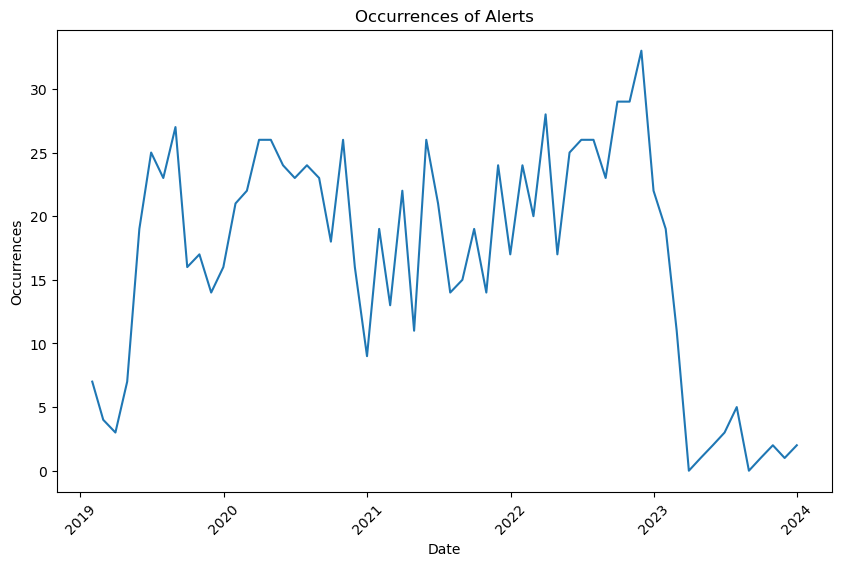

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data_resampled.index, data_resampled.values)
plt.xlabel('Date')
plt.ylabel('Occurrences')
plt.title('Occurrences of Alerts')
plt.xticks(rotation=45)
plt.show()

In [18]:
df_year = data.resample('Y').size()
df_year

Timestamp
2019-12-31    178
2020-12-31    258
2021-12-31    215
2022-12-31    302
2023-12-31     47
Freq: A-DEC, dtype: int64

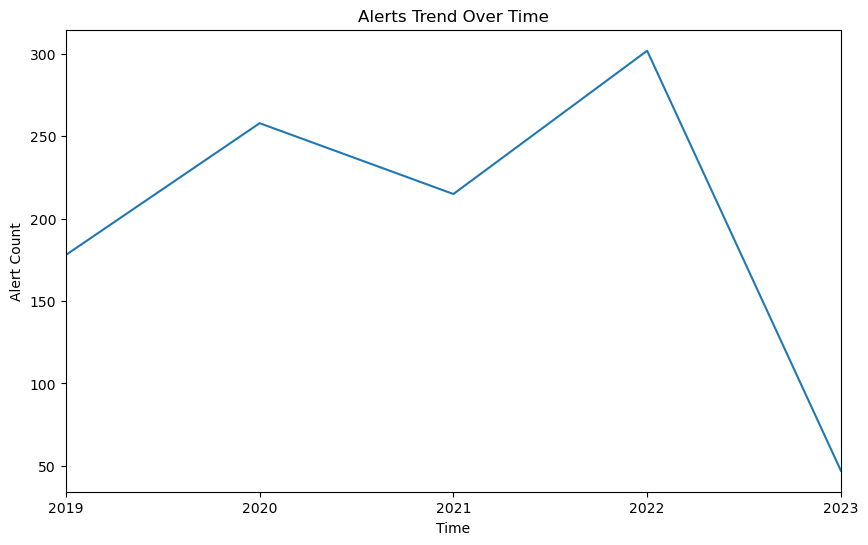

In [19]:
# Plot the trend over time
plt.figure(figsize=(10, 6))
df_year.plot()
plt.title('Alerts Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Alert Count')
plt.show()

In [20]:
df = data['Severity'].groupby(data.index.year).value_counts().unstack().fillna(0)
df

Severity,high,low,medium
Timestamp,,,
2019,66,60,52
2020,87,85,86
2021,74,72,69
2022,100,98,104
2023,20,15,12


In [21]:
df1 = data['Assigned To'].groupby(data.index.year).value_counts().unstack().fillna(0)
df1

Assigned To,Alice,Bob,David,Emily,Jane,John,Karen,Mike,Sara,Tom
Timestamp,,,,,,,,,,
2019,15,21,14,15,21,12,25,14,18,23
2020,20,20,29,21,30,30,22,34,26,26
2021,19,25,23,26,23,25,16,24,20,14
2022,29,36,28,33,36,24,24,36,29,27
2023,4,2,3,3,7,5,7,6,3,7


In [22]:
df2 = data['Alert Source'].groupby(data.index.year).value_counts().unstack().fillna(0)
df2

Alert Source,CPU,GPU,RAM,case,flash drive,hard drive,keyboard,modem,motherboard,power supply monitor,printer,router
Timestamp,,,,,,,,,,,,
2019,13,17,14,14,20,12,18,17,10,16,15,12
2020,22,27,22,17,14,25,23,21,18,19,26,24
2021,24,20,18,18,20,13,16,16,14,18,17,21
2022,24,26,21,25,26,20,26,22,20,35,28,29
2023,2,4,6,2,6,3,3,2,2,6,7,4


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_resampled, model='additive')

In [25]:
# Access the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

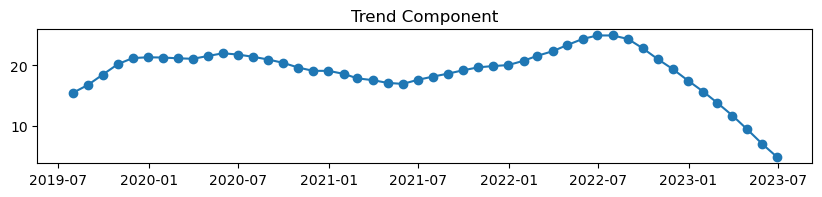

In [26]:
# Plot the decomposed components
plt.figure(figsize=(10, 8))

# Plot trend component
plt.subplot(411)
plt.plot(trend,marker='o')
plt.title('Trend Component')

# Show the plot
plt.show()

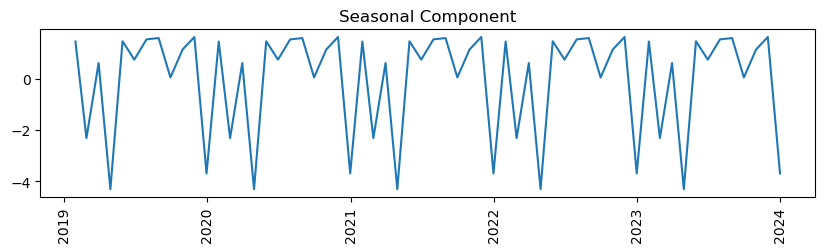

In [27]:
# Plot seasonal component
plt.figure(figsize=(10,10))
plt.subplot(412)
plt.plot(seasonal)
plt.title('Seasonal Component')
plt.xticks(rotation=90)
plt.show()

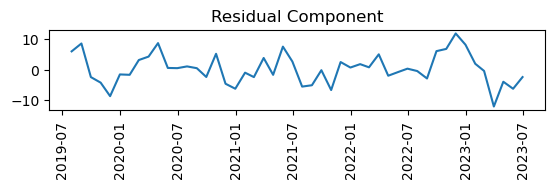

In [28]:
# Plot residual component
plt.subplot(413)
plt.plot(residual)
plt.title('Residual Component')
plt.xticks(rotation=90)
plt.show()

# ANOMALY DETECTION

In [29]:
df_mon = data.resample('M').size()

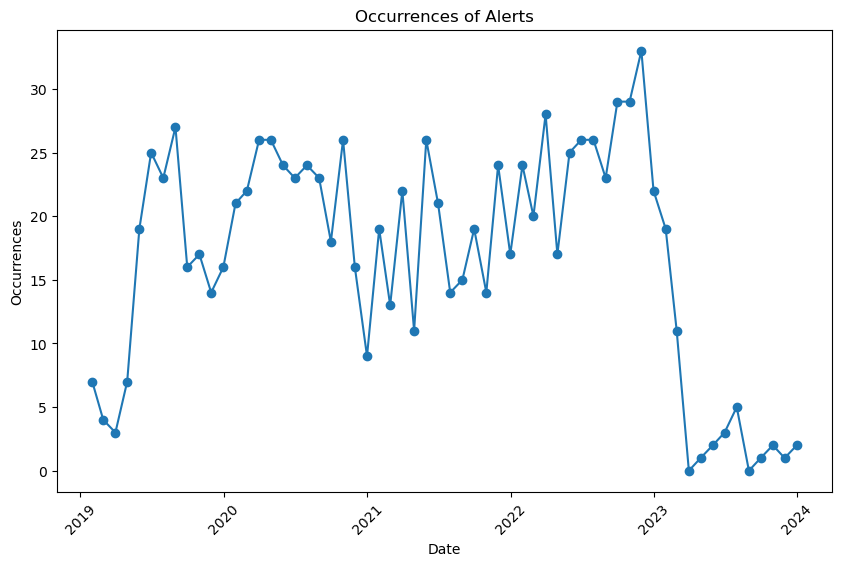

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_mon.index, df_mon.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Occurrences')
plt.title('Occurrences of Alerts')
plt.xticks(rotation=45)
plt.show()

In [31]:
df_mon.values

array([ 7,  4,  3,  7, 19, 25, 23, 27, 16, 17, 14, 16, 21, 22, 26, 26, 24,
       23, 24, 23, 18, 26, 16,  9, 19, 13, 22, 11, 26, 21, 14, 15, 19, 14,
       24, 17, 24, 20, 28, 17, 25, 26, 26, 23, 29, 29, 33, 22, 19, 11,  0,
        1,  2,  3,  5,  0,  1,  2,  1,  2], dtype=int64)

In [32]:
import numpy as np
from scipy import stats
values = df_mon.values
z_scores = stats.zscore(values)

outliers = np.array(values)[np.abs(z_scores) > 3]

print("Outliers:")
print(outliers)

Outliers:
[]


In [33]:
import numpy as np
import pandas as pd
values = df_mon.values
per = np.array(values)
q1 = np.percentile(per,25)
q3 = np.percentile(per,75)
IQR = q3-q1
low_bond = q1-1.5*IQR
up_bond = q3+1.5*IQR
outlier = per[(per<low_bond)|(per>up_bond)]
outliers

array([], dtype=int64)

In [34]:
low_bond

-9.75

In [35]:
up_bond

44.25

In [36]:
df_year = data.resample('Y').size()
df_year

Timestamp
2019-12-31    178
2020-12-31    258
2021-12-31    215
2022-12-31    302
2023-12-31     47
Freq: A-DEC, dtype: int64

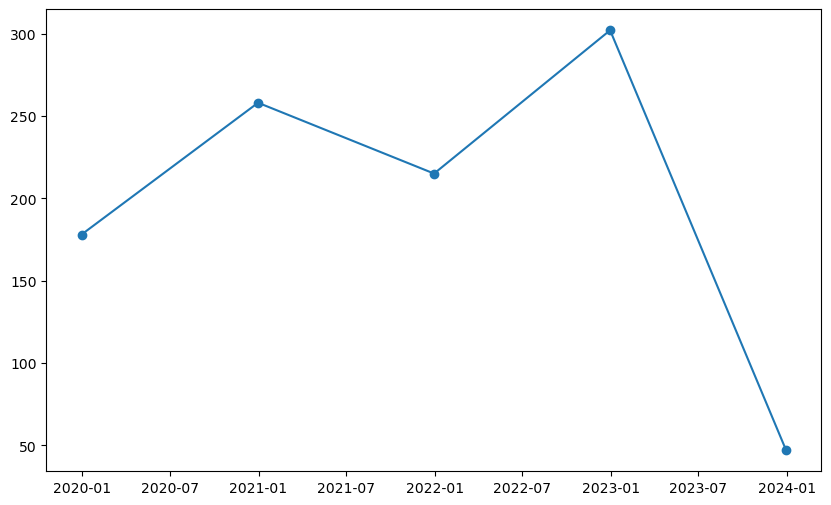

In [37]:
plt.figure(figsize=(10,6))
plt.plot(df_year.index,df_year.values,marker='o')

In [38]:
import numpy as np
from scipy import stats
values = df_year.values
z_scores = stats.zscore(values)

outliers = np.array(values)[np.abs(z_scores) > 3]

print("Outliers:")
print(outliers)

Outliers:
[]
